## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [ ]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [ ]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

In [ ]:
def draw_line(coef,intercept, mi, ma):
    
    points=np.array([[mi, mi*coef+intercept],[ ma,ma*coef+intercept]])
    plt.plot(points[:,0], points[:,1])

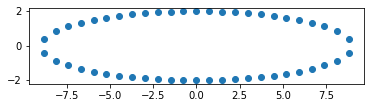

In [ ]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

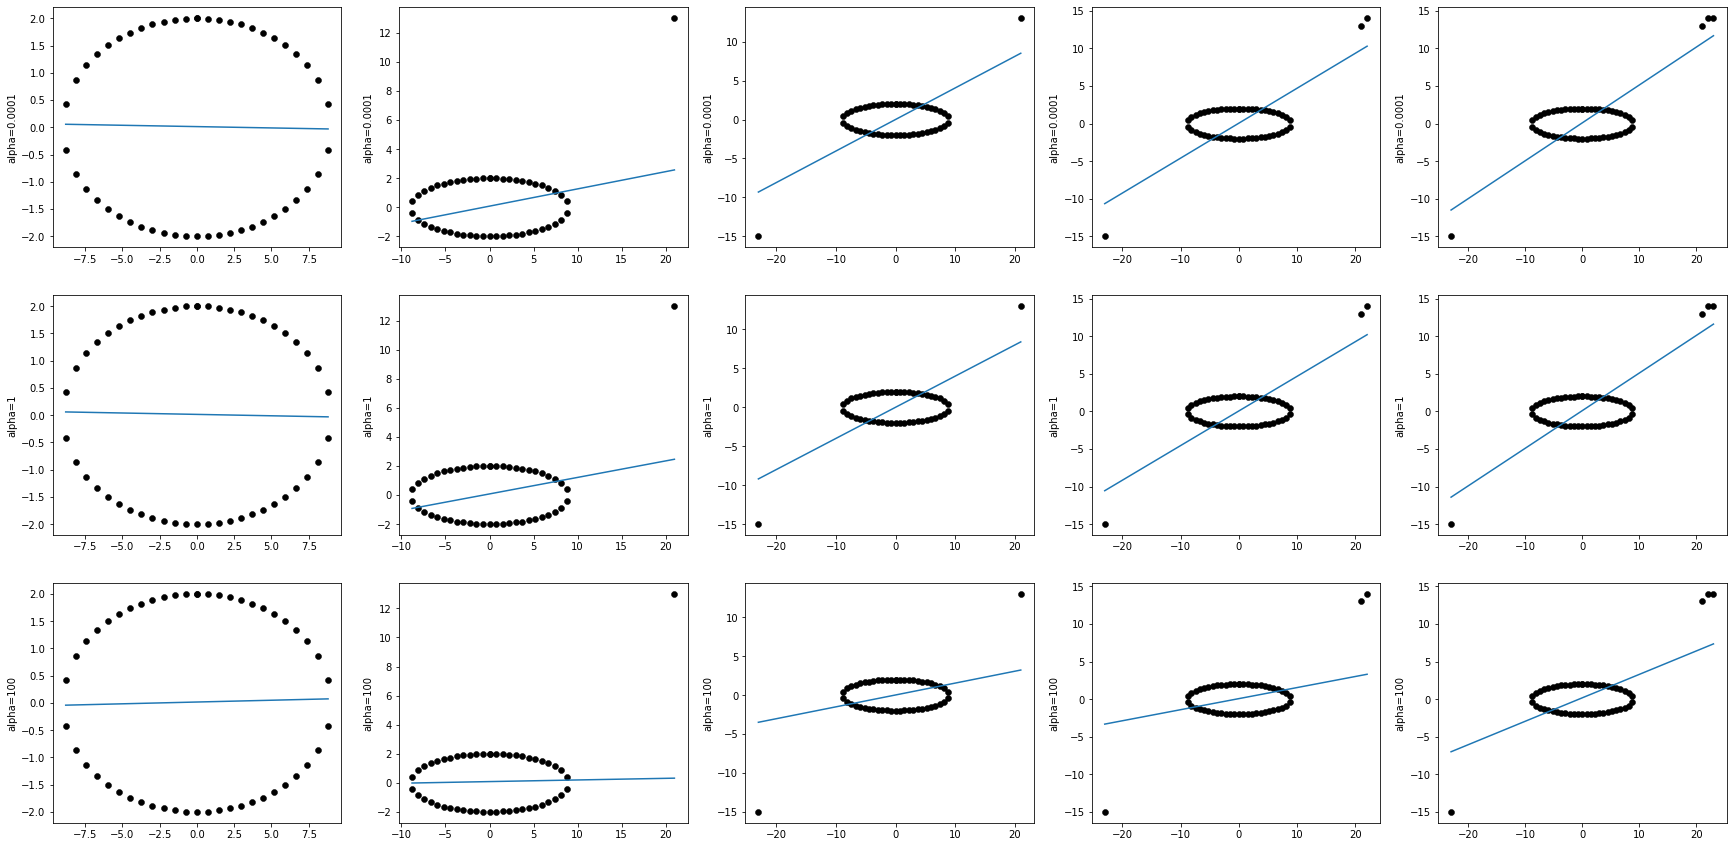

In [ ]:
plt.figure(figsize=(30,15))
idx = 0
clf = SGDRegressor(eta0=0.001,learning_rate='constant',random_state=0)
for alp in [0.0001,1,100]:
    
    X= b * np.sin(phi)
    Y= a * np.cos(phi)
    clf.set_params(alpha=alp)


    for outlr in [[0,2],[21, 13], [-23, -15],[22,14], [23, 14]] :
        idx+=1
        plt.subplot(3,5,idx)

        X = np.append(X,outlr[0])
        Y = np.append(Y,outlr[1])

        
        clf.fit(X.reshape(-1,1),Y.reshape(-1,1))
        
        draw_line(clf.coef_,clf.intercept_,X.min(),X.max())

        plt.scatter(X,Y,color='black',linewidths=0.5)
        plt.ylabel("alpha="+str(alp))
plt.show() 

##Minimization problem
We minimize E, where is

$E(w,b) = \frac{1}{n}\sum_{i=1}^{n} L(y_i, f(x_i)) + \alpha R(w)$

$L(y_i, f(x_i)) = \frac{1}{2}(y_i - f(x_i))^2$ (R-squared error)

α is the regularization hyper parameter


##Observations:
* Squared error is the loss function used by default and l2 regularization.
* Squared loss is effected by outliers exponentially, hence the regression deviates.
* As number of outliers increases the regression line deviates further
* Lower values of alpha has little effect on outliers, since regularization is ignored.
* When α= 100, regularization has has taken care of only one outlier, but with further increase in outliers regularization has no effect.



##Ref:
1.https://eranraviv.com/outliers-and-loss-functions/